# Ford GoBike System Data Analysis

### by Mahyar Khatirinejad

##  About the Dataset 

***This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Bay Area Bike Share Trips Data available at:
https://www.google.com/url?q=https://www.fordgobike.com/system-data&sa=D&ust=1554486256012000***

***San Francisco offers bike ride services as a way for commuters / visitors to travel through the congested city lanes. There are about 700 bikes available through the network and the dataset incldues bike share trips data that comprises trip details from August 2013 through August 2016. Details include trip information such as duration, start and end stations, subscriber type, etc.***

***There are 11070 bikes in this dataset with 2,506,983 rows and 15 features (duration_sec, start time, end time, start station id, start station name,start_station_latitude, start_station_longitude,end station id, end station name, end_station_latitude, end_station_longitude, bike_id, user_type, bike share for all trip, rental access method).***


In [ ]:

Main areas of interest in the dataset
1) Average trip times 
2) Monthly bike ride trend by average trip times 
3) Average trip times by gender

## Gathering Data 

In [72]:
# import all the required packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

In [73]:
data_files   = ['C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201901-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201902-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201903-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201904-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201905-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201906-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201907-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201908-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201909-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201910-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201911-baywheels-tripdata.csv',   
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201912-baywheels-tripdata.csv']


In [74]:
bike_data = pd.concat([pd.read_csv(f,) for f in glob.glob("C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data" + "/*.csv")],ignore_index=True)

C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


## Assessing Data

In [75]:
bike_data.shape

(2506983, 15)

In [76]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [77]:
sum(bike_data.duplicated())

0

In [78]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [79]:
#maybe i should drop the null columns
bike_data.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [80]:
bike_data.bike_id.value_counts()

3135      912
3146      911
3569      889
3249      882
1502      882
         ... 
3973        1
655034      1
92          1
3214        1
6271        1
Name: bike_id, Length: 11070, dtype: int64

In [81]:
bike_data.bike_id.nunique()

11070

In [82]:
bike_data.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [118]:
bike_data.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [119]:
bike_data.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [83]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


# Cleaning Dataset 

In [115]:
#We make a copy of the dataset to keep the original list unchanged when the new list is modified

df_bike_clean = bike_data.copy()

In [116]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


### 1. Define:
***Droping the "bike_share_for_all_trip" and "rental_access_method" becuse the first one is not documented and second one has so many NaN values.***
### Code:

In [117]:
df_bike_clean.drop(['bike_share_for_all_trip','rental_access_method'],inplace=True,axis=1)

In [107]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 248.6+ MB


### 2. Define: 
***converting the 'start_station_id', 'end_station_id', 'bike_id', to strings***
   
***Converting the 'start_time' and 'end_time' to datatime***
### Code

In [108]:
df_bike_clean['start_station_id']= df_bike_clean['start_station_id'].astype('str')
df_bike_clean['end_station_id']= df_bike_clean['end_station_id'].astype('str')
df_bike_clean['bike_id']= df_bike_clean['bike_id'].astype('str')

df_bike_clean['start_time']= df_bike_clean['start_time'].astype('datetime64[ns]')
df_bike_clean['end_time']= df_bike_clean['end_time'].astype('datetime64[ns]')
#df_bike_clean['duration_sec']= df_bike_clean['duration_sec'].astype('datetime64[ns]')

In [109]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 248.6+ MB


### 3. Define:

***Dropping non-essential columns for convenience:*** 

### Code:

In [114]:
df_bike_clean.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

KeyError: "['start_station_latitude' 'start_station_longitude' 'end_station_latitude'\n 'end_station_longitude'] not found in axis"

In [113]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration_sec        int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   start_station_id    object        
 4   start_station_name  object        
 5   end_station_id      object        
 6   end_station_name    object        
 7   bike_id             object        
 8   user_type           object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 172.1+ MB


# Investigating Dataset 

In [ ]:
My 
Main areas of interest in the dataset
1) Average trip times 
2) Monthly bike ride trend by average trip times 
3) 10 Most common places for starting a trip


# Univariate Exploration

### Average bike trips vs seconds

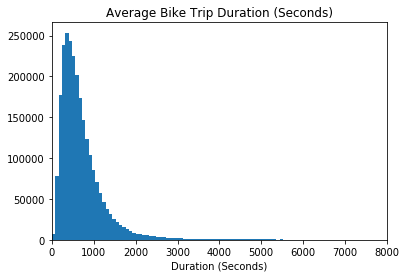

In [102]:
bin_edges = np.arange(0, df_bike_clean['duration_sec'].max() + 100 , 80)
plt.hist(data = df_bike_clean , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');